In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.shape

(200, 5)

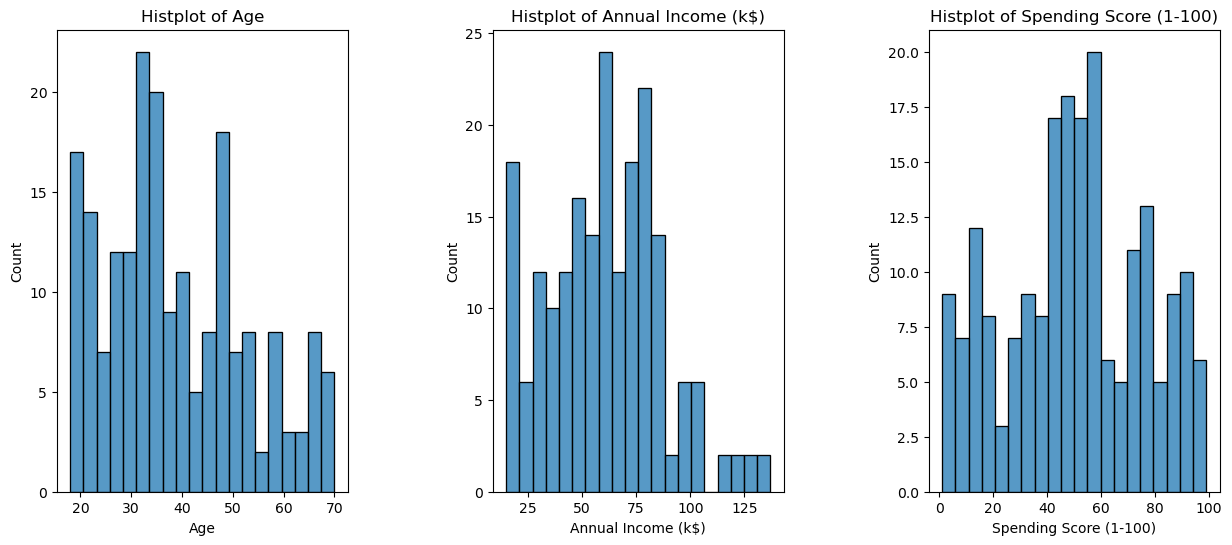

In [9]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.histplot(df[x],bins=20)
    plt.title('Histplot of {}'.format(x))
plt.show()

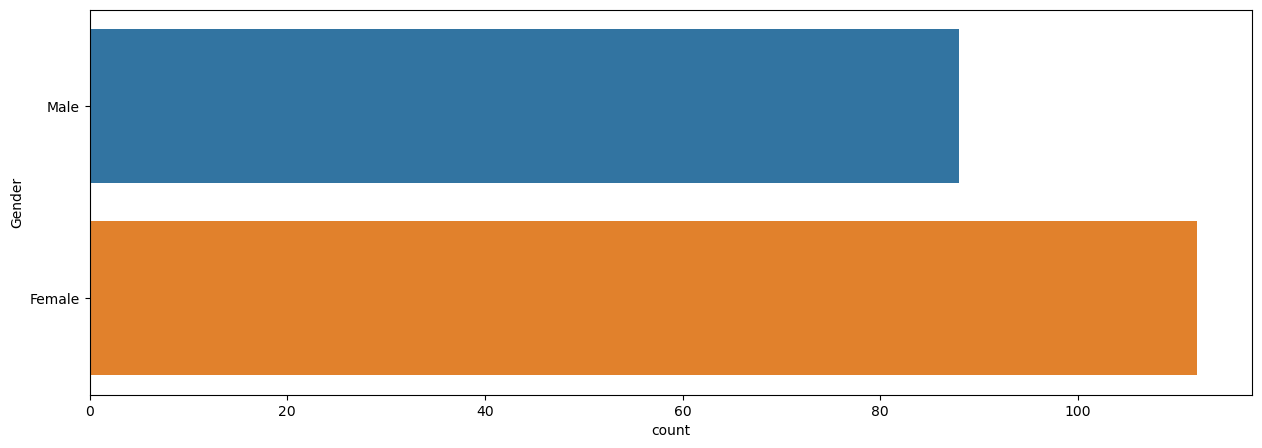

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

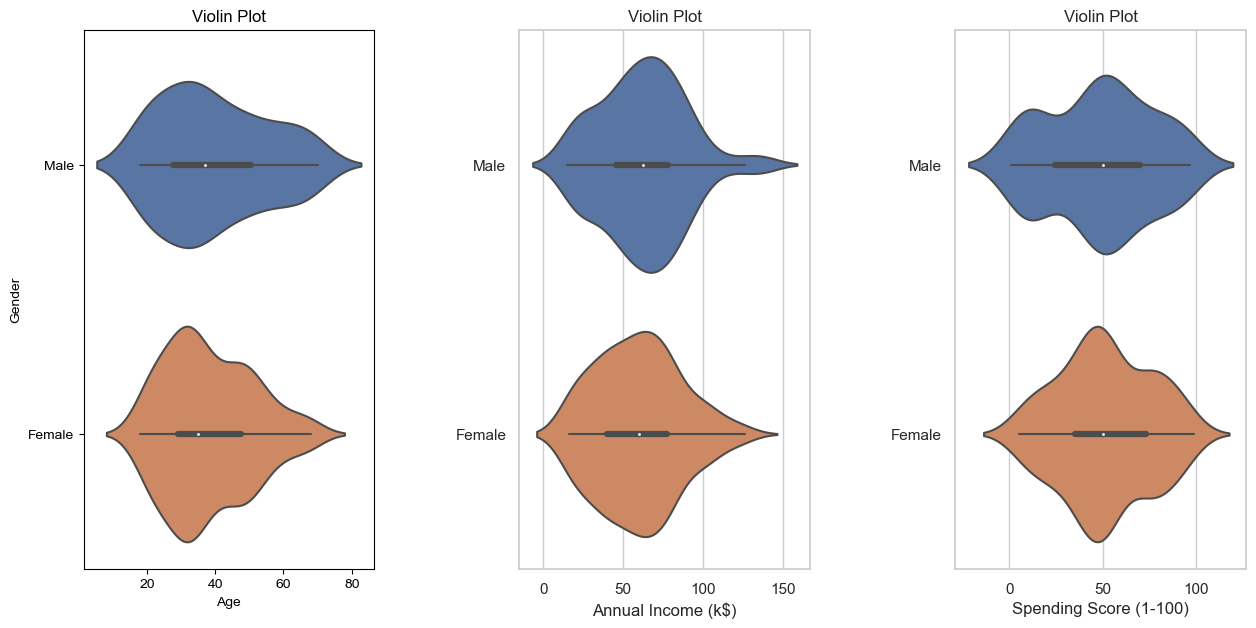

In [11]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.violinplot(x=cols, y='Gender',data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

In [12]:
age_18_25=df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35=df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45=df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55=df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above=df.Age[df.Age >= 56]

In [13]:
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

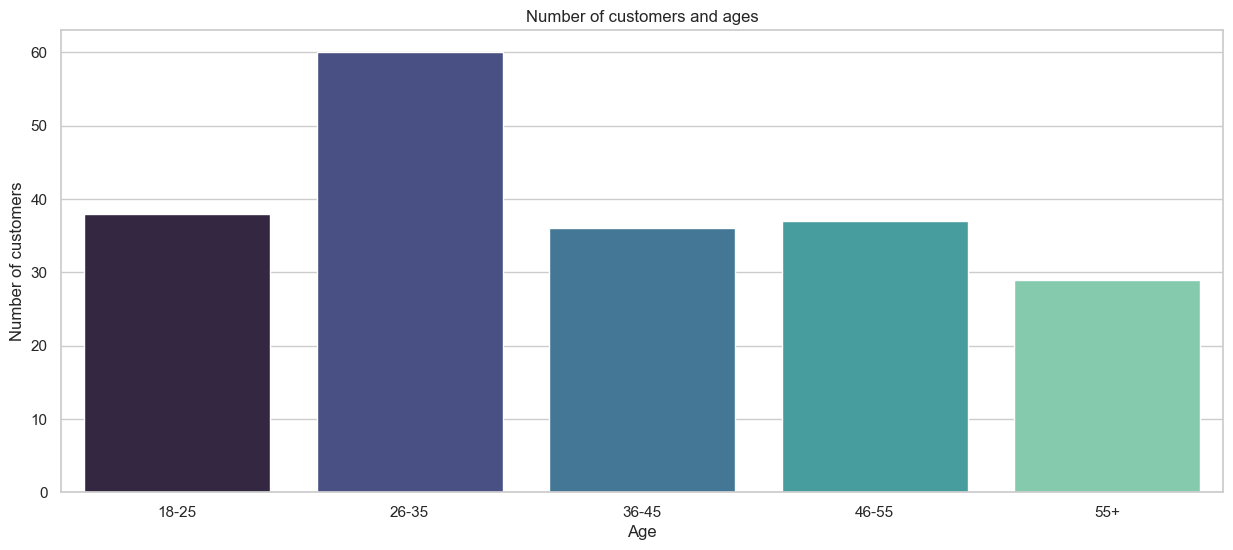

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

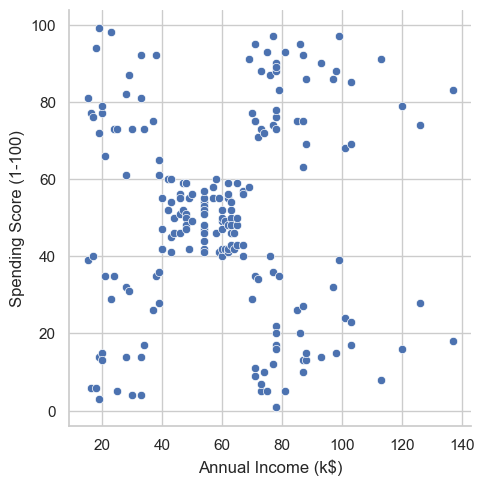

In [15]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

In [16]:
ss_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

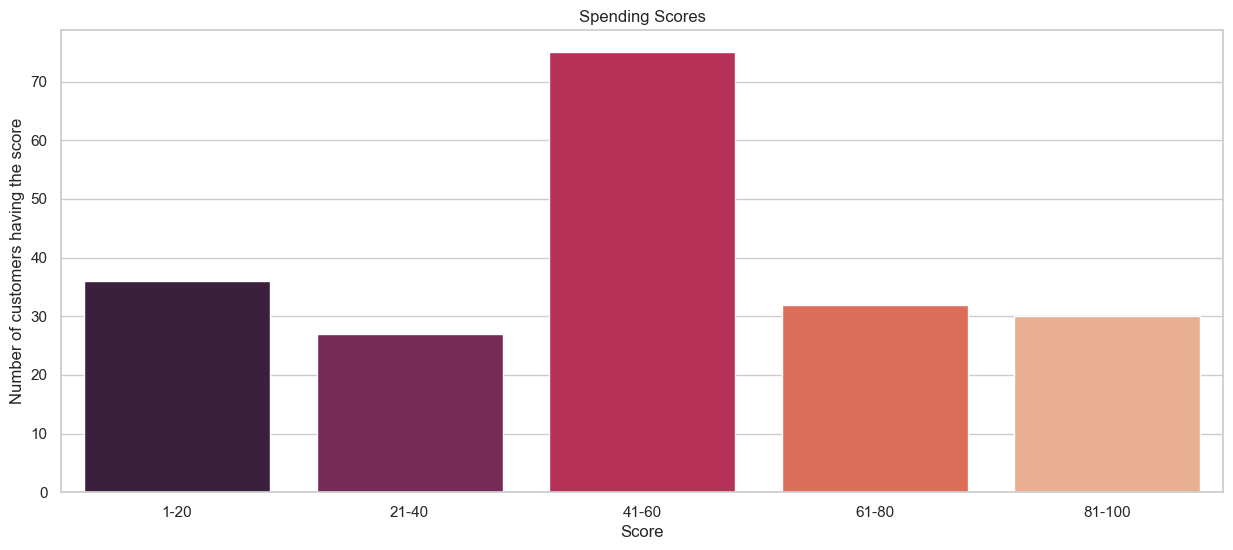

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of customers having the score")
plt.show()

In [18]:
ai0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix=["0-30","31-60","61-90","91-120","121-150"]
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

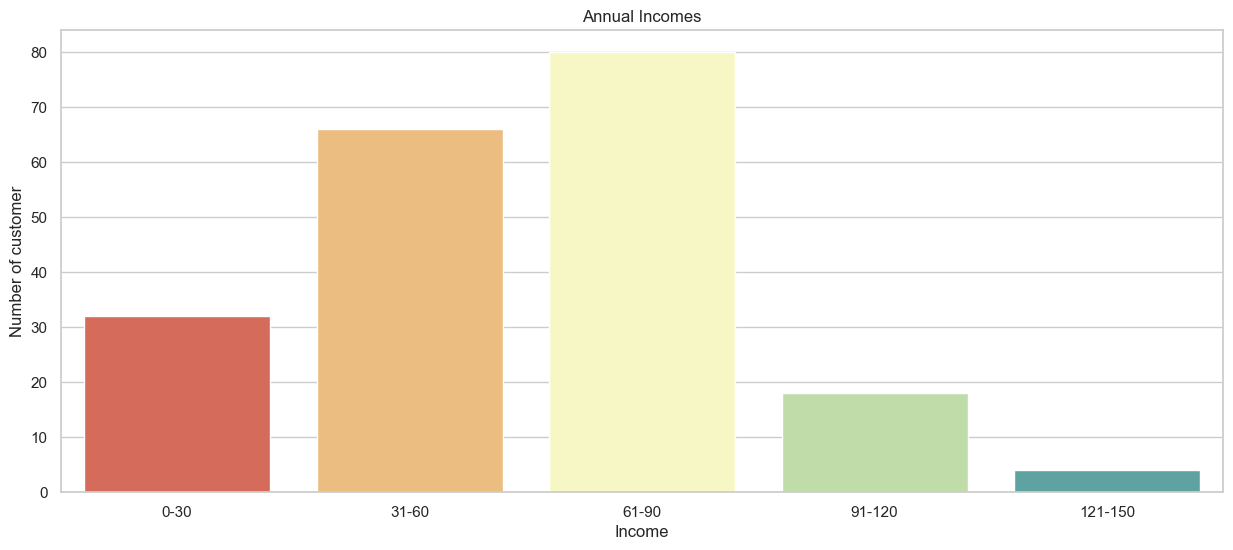

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customer")
plt.show()

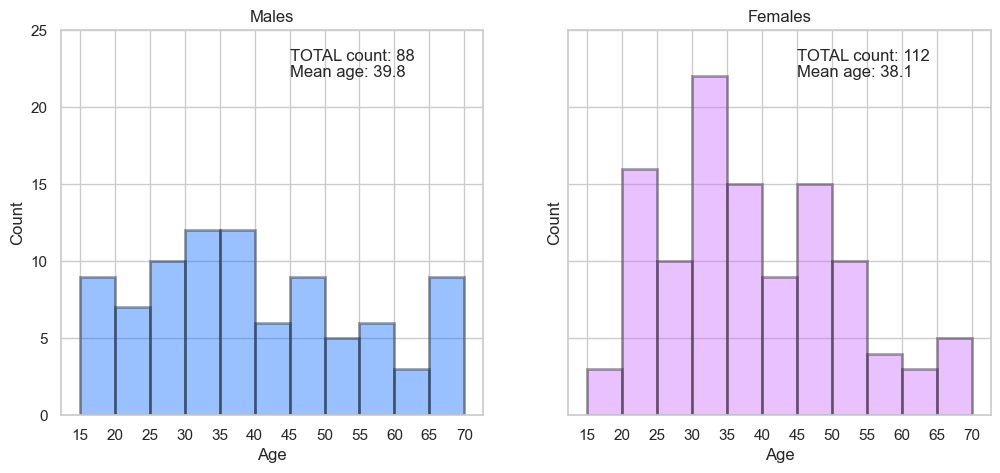

In [20]:
males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

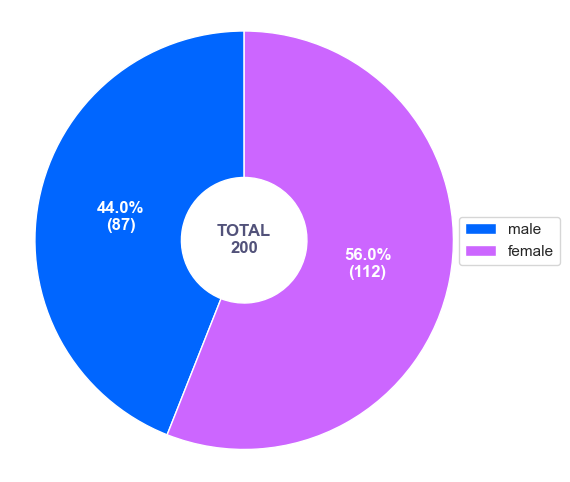

In [21]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(df['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

## K-Means Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

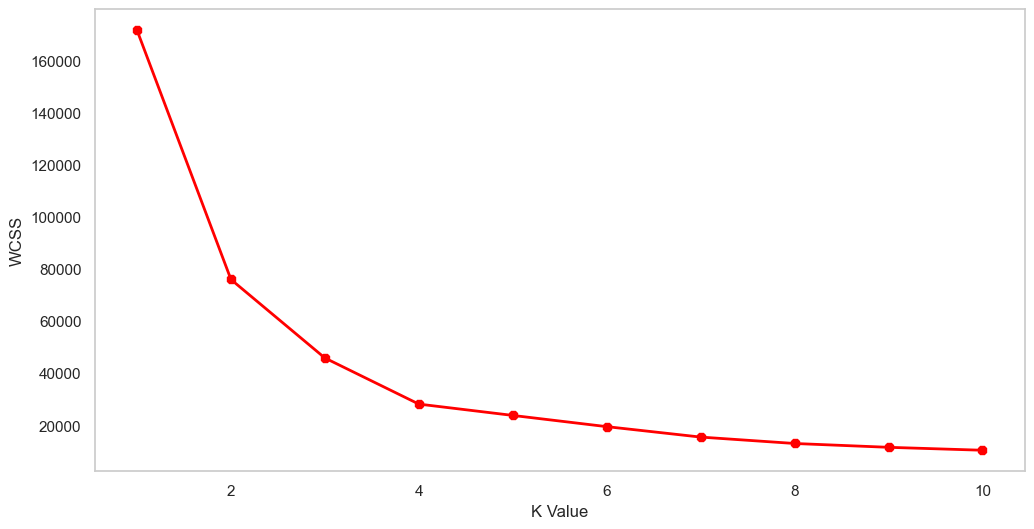

In [22]:
X1=df.loc[:,["Age","Spending Score (1-100)"]].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show

In [23]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 3 3 2 0 3 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 3 2 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 0 3 0 1 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [24]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


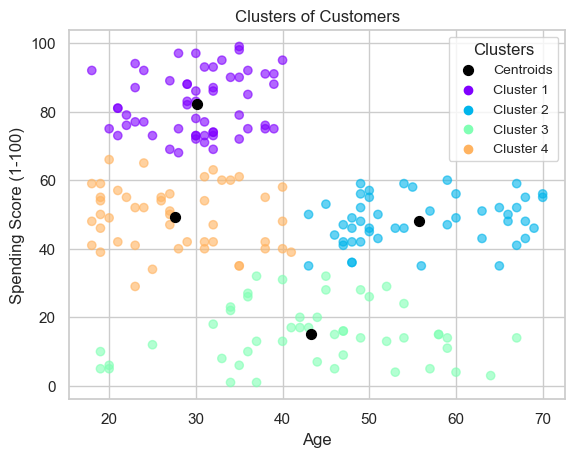

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#
# Existing scatter plot for data points
colors = [plt.cm.rainbow(label / len(np.unique(kmeans.labels_))) for label in kmeans.labels_]
plt.scatter(X1[:, 0], X1[:, 1], c=colors, alpha=0.6)

# Scatter plot for cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', s=50, label='Centroids')

# Adding labels for clusters with corresponding colors
unique_labels = np.unique(kmeans.labels_)
for cluster in unique_labels:
    cluster_color = plt.cm.rainbow(cluster / len(unique_labels))  # Get consistent color
    plt.scatter([], [], color=cluster_color, label=f'Cluster {cluster + 1}')  # Dummy point for legend

# Title, labels, and legend
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters', fontsize=10)
plt.show()



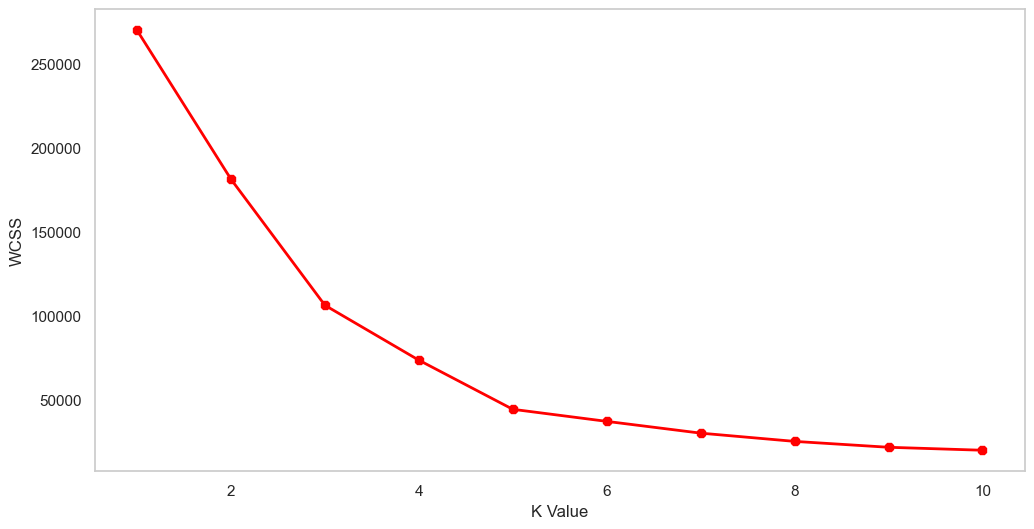

In [26]:
X2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [28]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


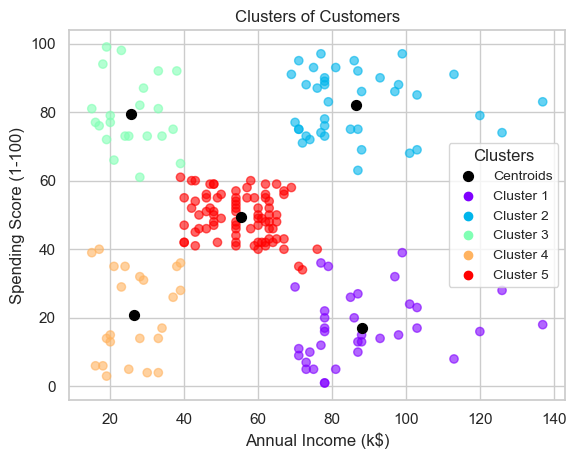

In [29]:
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', s=50, label='Centroids')
unique_labels = np.unique(kmeans.labels_)
colormap = scatter.cmap
norm = scatter.norm
for cluster in unique_labels:
    cluster_color = colormap(norm(cluster))
    plt.scatter([], [], color=cluster_color, label=f'Cluster {cluster + 1}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters', fontsize=10)
plt.show()



## Affinity Propagation

In [30]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31


In [31]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [32]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()



,preference,clusters,sil_score
149,-5100.0,6.0,0.476051
148,-5200.0,6.0,0.476051
123,-7700.0,6.0,0.476051
68,-13200.0,6.0,0.475186
129,-7100.0,6.0,0.475186


In [33]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [34]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [35]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,30
1,23
2,68
3,42
4,37


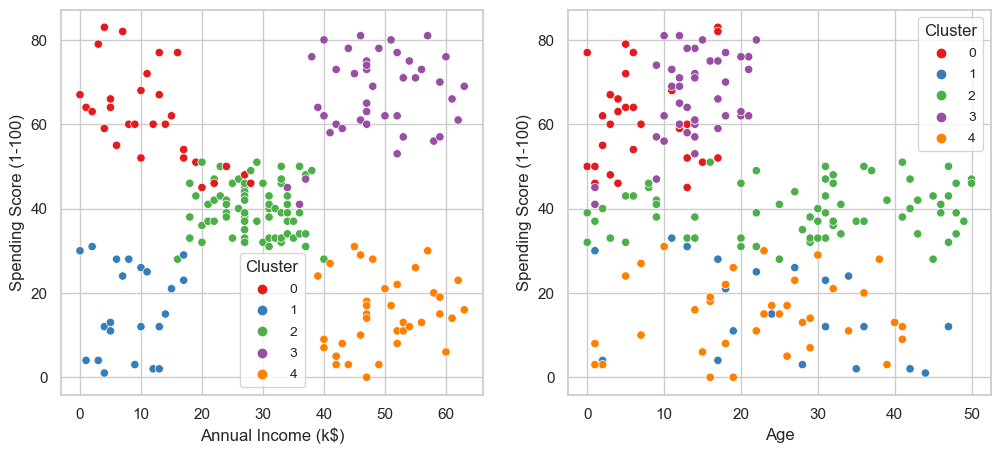

In [36]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

## Calculating the Accuracy of Each Method

### K-Means

In [37]:
scaler=MinMaxScaler()
scale_df=scaler.fit_transform(df)
print(scale_df[0:4])

[[0.         1.         0.02       0.         0.36144578]
 [0.00502513 1.         0.06       0.         0.80722892]
 [0.01005025 0.         0.04       0.01587302 0.04819277]
 [0.01507538 0.         0.1        0.01587302 0.77108434]]


In [38]:
sil_score=[]

In [39]:
model = KMeans(n_clusters=4, init='k-means++',random_state=0)
model.fit(scale_df)
sil_score_avg=silhouette_score(scale_df,model.predict(scale_df))
print(sil_score_avg)

0.34444850304113295


In [40]:
sil_score_ind=silhouette_samples(scale_df,model.predict(scale_df))
print(sil_score_ind)

[ 0.33640492  0.35187463  0.36350945  0.43644325  0.49548437  0.43423649
  0.42355604  0.38098144  0.37971279  0.48227075  0.40641593  0.39098283
  0.42145661  0.44294149  0.38741016  0.35567031  0.51250806  0.35303407
  0.46815713  0.38801042  0.43048488  0.38218402  0.41796059  0.41566572
  0.43307776  0.37789613  0.51374974  0.44498719  0.51378004  0.38377747
  0.37187203  0.4102932   0.37022649  0.25209068  0.44118703  0.37703898
  0.46171915  0.45248616  0.47265685  0.37090185  0.39162152  0.26541735
  0.46027785  0.46334538  0.46402452  0.40575951  0.47301366  0.43741564
  0.44436054  0.45690559  0.47434798  0.36244229  0.4414929   0.43574216
  0.46069723  0.43591688  0.44511688  0.40873304  0.37777001  0.44326778
  0.39177367  0.16888162  0.313937    0.37370055  0.41771181  0.12540769
  0.40740525  0.28991104  0.12237411  0.35085298  0.3656903   0.37463201
  0.30251251  0.29015324  0.38200685  0.10731931  0.3213795   0.26306326
  0.1828734   0.31070083  0.36627532  0.2198819   0

In [41]:
for each_val in sil_score:
    if each_val<0:
        print(f'We have found a negative silhouette score: {each_val}')

In [42]:
score1 = silhouette_score (df, kmeans.labels_)
print("Score = ", score1)

Score =  0.42238973531855684


In [43]:
score = sklearn.metrics.silhouette_samples(df, kmeans.labels_, metric='euclidean')
print("Score = ", score)

Score =  [ 7.08460279e-02  5.72560335e-01  3.94370618e-01  5.79855572e-01
  1.99004739e-01  5.94996798e-01  5.30848157e-01  6.32393165e-01
  5.61466524e-01  5.59348968e-01  5.48759556e-01  6.03663914e-01
  5.88905895e-01  6.68458513e-01  5.76516252e-01  6.86973941e-01
  3.81246705e-01  5.76476625e-01  5.44778714e-01  6.31252346e-01
  3.92815789e-01  6.59829494e-01  6.34495629e-01  6.25944232e-01
  6.39191211e-01  6.91808001e-01  5.17950319e-01  4.19190077e-01
  4.98694675e-01  6.96530145e-01  6.02524946e-01  6.31285962e-01
  6.14137328e-01  6.56127541e-01  6.12925350e-01  6.53493374e-01
  5.68382081e-01  5.53189012e-01  4.56391990e-01  5.83252888e-01
  3.92578443e-01  5.78431813e-01  3.85022315e-01 -4.22605628e-01
  4.09353173e-01  4.11867905e-01 -8.71123806e-02 -1.57665523e-01
 -1.61796583e-01 -1.42778347e-01 -1.23275316e-05 -1.73279337e-01
 -6.35265241e-02  1.28600210e-01  3.86461381e-02  1.37923326e-02
  1.65421400e-01  1.04828589e-01  1.33694939e-01  2.05241525e-01
  2.37630778e-01

### Affinity Propagation

In [44]:
score3 = silhouette_score (df, AF.labels_)
print("Score = ", score3)

Score =  0.3932824890466348


Text(0.5, 1.0, 'Silhouette Scores of Clustering Methods')

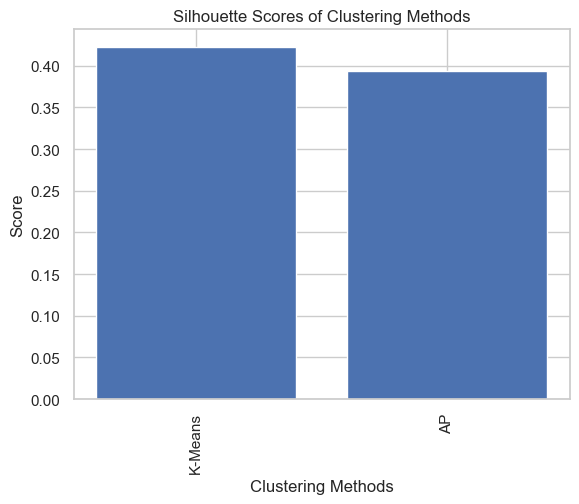

In [45]:
Clustering=['K-Means','AP']
silhouette_scores=[score1,score3]
plt.bar(Clustering,silhouette_scores)
plt.xlabel('Clustering Methods')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.title('Silhouette Scores of Clustering Methods')

In [46]:
# import numpy as np
# import joblib
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import AffinityPropagation, KMeans

# # Choose the best Affinity Propagation and K-Means solutions (based on silhouette score/WCSS)
# best_af_preference = af_results.sort_values(by='sil_score', ascending=False).iloc[0]['preference']
# best_kmeans_clusters = 5  # Based on your WCSS plot (or you could choose another)

# # Apply Affinity Propagation with best preference
# AF = AffinityPropagation(preference=best_af_preference, max_iter=200).fit(X_numerics)
# af_labels = AF.labels_

# # Apply K-Means with chosen number of clusters
# kmeans = KMeans(n_clusters=best_kmeans_clusters, init="k-means++", random_state=42)
# kmeans_labels = kmeans.fit_predict(X2)

# # Construct a similarity matrix between the clusters of K-Means and Affinity Propagation
# similarity_matrix = np.zeros((best_kmeans_clusters, len(np.unique(af_labels))))

# # For each K-Means cluster and Affinity Propagation cluster, count the number of data points
# for i in range(best_kmeans_clusters):
#     for j in range(len(np.unique(af_labels))):
#         similarity_matrix[i, j] = np.sum((kmeans_labels == i) & (af_labels == j))

# # Normalize the similarity matrix (optional)
# similarity_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)

# # Create a final cluster ID
# final_labels = np.zeros(len(X2))

# # Assign the most similar pair of clusters
# for i in range(len(X2)):
#     af_cluster = af_labels[i]
#     km_cluster_sim = similarity_matrix[:, af_cluster].argmax()
#     final_labels[i] = km_cluster_sim

# # Define a class to handle predictions for the merged clustering model
# class MergedClusteringModel:
#     def __init__(self, kmeans_model, similarity_matrix, af_model):
#         self.kmeans_model = kmeans_model
#         self.similarity_matrix = similarity_matrix
#         self.af_model = af_model

#     def predict(self, new_data):
#         af_labels = self.af_model.predict(new_data)  # Predict using Affinity Propagation
#         final_predictions = []
#         for af_label in af_labels:
#             km_cluster_sim = self.similarity_matrix[:, af_label].argmax()  # Map to K-Means cluster
#             final_predictions.append(km_cluster_sim)
#         return np.array(final_predictions)

# # Save the merged clustering model using joblib
# merged_model = MergedClusteringModel(kmeans, similarity_matrix, AF)
# joblib.dump(merged_model, "customer_segmentation")
# print("Merged clustering model saved as 'customer_segmentation")



In [49]:
import joblib
# Choose the best Affinity Propagation and K-Means solutions (based on silhouette score/WCSS)
best_af_preference = af_results.sort_values(by='sil_score', ascending=False).iloc[0]['preference']
best_kmeans_clusters = 5  # Based on your WCSS plot (or you could choose another)

# Apply Affinity Propagation with best preference
AF = AffinityPropagation(preference=best_af_preference, max_iter=200).fit(X_numerics)
af_labels = AF.labels_

# Apply K-Means with chosen number of clusters
kmeans = KMeans(n_clusters=best_kmeans_clusters, init="k-means++", random_state=42)
kmeans_labels = kmeans.fit_predict(X2)

# Construct a similarity matrix between the clusters of K-Means and Affinity Propagation
similarity_matrix = np.zeros((best_kmeans_clusters, len(np.unique(af_labels))))

# For each K-Means cluster and Affinity Propagation cluster, count the number of data points
for i in range(best_kmeans_clusters):
    for j in range(len(np.unique(af_labels))):
        similarity_matrix[i, j] = np.sum((kmeans_labels == i) & (af_labels == j))

# Normalize the similarity matrix (optional)
similarity_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)

# Create a final cluster ID
final_labels = np.zeros(len(X2))

# Assign the most similar pair of clusters
for i in range(len(X2)):
    af_cluster = af_labels[i]
    km_cluster_sim = similarity_matrix[:, af_cluster].argmax()
    final_labels[i] = km_cluster_sim

# Define a class to handle predictions for the merged clustering model
class MergedClusteringModel:
    def __init__(self, kmeans_model, similarity_matrix, af_model):
        self.kmeans_model = kmeans_model
        self.similarity_matrix = similarity_matrix
        self.af_model = af_model

    def predict(self, new_data):
        af_labels = self.af_model.predict(new_data)  # Predict using Affinity Propagation
        final_predictions = []
        for af_label in af_labels:
            km_cluster_sim = self.similarity_matrix[:, af_label].argmax()  # Map to K-Means cluster
            final_predictions.append(km_cluster_sim)
        return np.array(final_predictions)

# Save the merged clustering model using joblib
merged_model = MergedClusteringModel(kmeans, similarity_matrix, AF)
joblib.dump(merged_model, "customer_segmentation.joblib")
print("Merged clustering model saved as 'customer_segmentation.joblib'")

Merged clustering model saved as 'customer_segmentation.joblib'


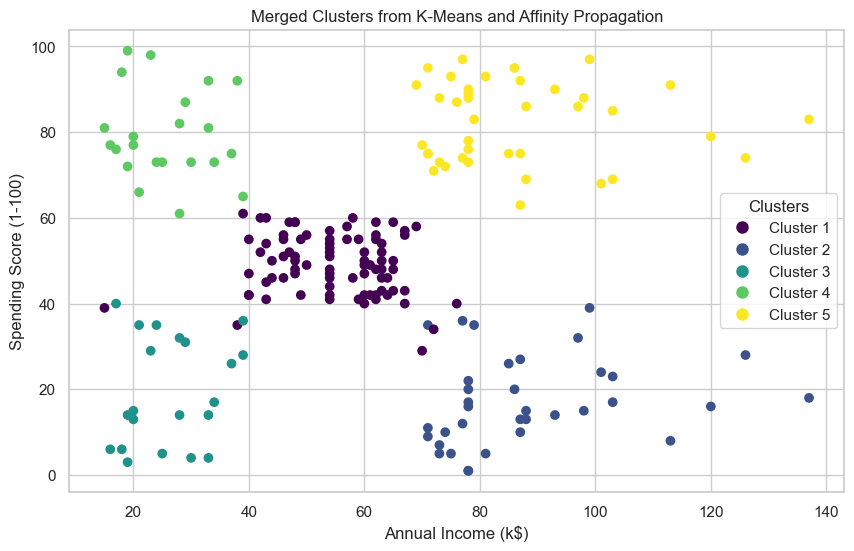

Silhouette Score for Merged Clusters: 0.5440334728953446


In [50]:

plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("viridis", len(np.unique(final_labels)))
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=final_labels, cmap=cmap, marker='o')
num_clusters = len(np.unique(final_labels))
cluster_labels = [f"Cluster {i+1}" for i in range(num_clusters)]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10)
           for i in range(num_clusters)]
plt.legend(handles, cluster_labels, title="Clusters")
plt.title("Merged Clusters from K-Means and Affinity Propagation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
sil_score = silhouette_score(X2, final_labels)
print(f"Silhouette Score for Merged Clusters: {sil_score}")

Text(0.5, 1.0, 'Silhouette Scores of Clustering Methods without PCA transformation')

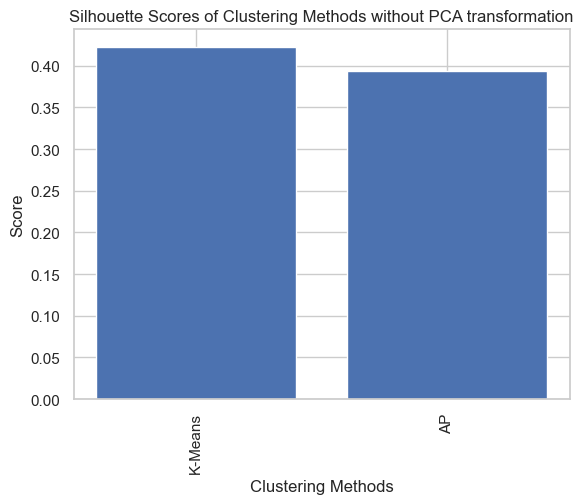

In [53]:
Clustering=['K-Means','AP']
silhouette_scores=[score1,score3]
plt.bar(Clustering,silhouette_scores)
plt.xlabel('Clustering Methods')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.title('Silhouette Scores of Clustering Methods without PCA transformation')

In [54]:
# Load the saved model and predict
model = joblib.load("customer_segmentation")
# new_data = np.array([[15, 29, 50]])  # Example data points
# model.predict(new_data)
# print(f"Predicted clusters for the new data points: {predictions}")


In [55]:
from tkinter import *
import tkinter as tk
import joblib

In [ ]:

from tkinter import messagebox
import numpy as np
import joblib

# Load the saved model
model = joblib.load("customer_segmentation.joblib")

def predict_cluster():
    try:
        # Get inputs from the GUI
        age = float(entry_age.get())
        spending_score = float(entry_score.get())
        annual_income = float(entry_income.get())
        
        # Prepare the data for prediction
        new_data = np.array([[age, spending_score, annual_income]])
        
        # Predict using the model
        predictions = model.predict(new_data)
        cluster_number = int(predictions[0])  # Get the cluster number
        
        # Detailed message
        message = f"Customer belongs to Cluster Number {cluster_number}."
        if cluster_number == 0:
            message += " customer with medium annual income and medium annual spending score."
        elif cluster_number == 1:
            message += "customer with low annual income but high annual spending score ."
        elif cluster_number == 2:
            message += " customer with low annual income and low spending score."
        elif cluster_number == 3:
            message += " customer with high annual income and low annual spending score."
        elif cluster_number == 4:
            message += " customer with high annual income and high annual spending score ."
        
        # Display the prediction result
        messagebox.showinfo("Prediction Result", message)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Create the Tkinter GUI
root = tk.Tk()
root.title("Customer segmentation")

# Labels and input fields
tk.Label(root, text="Age:").grid(row=0, column=0, padx=10, pady=10)
entry_age = tk.Entry(root)
entry_age.grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="Spending Score (1-100):").grid(row=1, column=0, padx=10, pady=10)
entry_score = tk.Entry(root)
entry_score.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Annual Income (k$):").grid(row=2, column=0, padx=10, pady=10)
entry_income = tk.Entry(root)
entry_income.grid(row=2, column=1, padx=10, pady=10)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_cluster)
predict_button.grid(row=3, column=0, columnspan=2, pady=20)

# Run the Tkinter main loop
root.mainloop()
